<a href="https://colab.research.google.com/github/ChairunnisaAmanda/Gromacs_Plot/blob/main/Gromacs_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gromacs Plotting from .xvg Files to .png

Import libraries

In [ ]:
import re
import csv
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MultipleLocator
import matplotlib
from matplotlib import rcParams

## RMSD
**Input file:**


*   Complex RMSD (.xvg)
*   Protein RMSD (.xvg)
*   Ligand RMSD (.xvg)

**Output file:**


*   CSV file of all RMSD combined
*   Plot file (png)



Enter complex XVG file: rmsd_comp.xvg
Enter protein XVG file: rmsd_prot.xvg
Enter ligand XVG file: rmsd_lig-lig.xvg
Enter output CSV filename: rmsd.csv
Enter output plot filename: rmsd_plot.png
Data has been written to rmsd.csv
RMSD plot saved as rmsd_plot.png


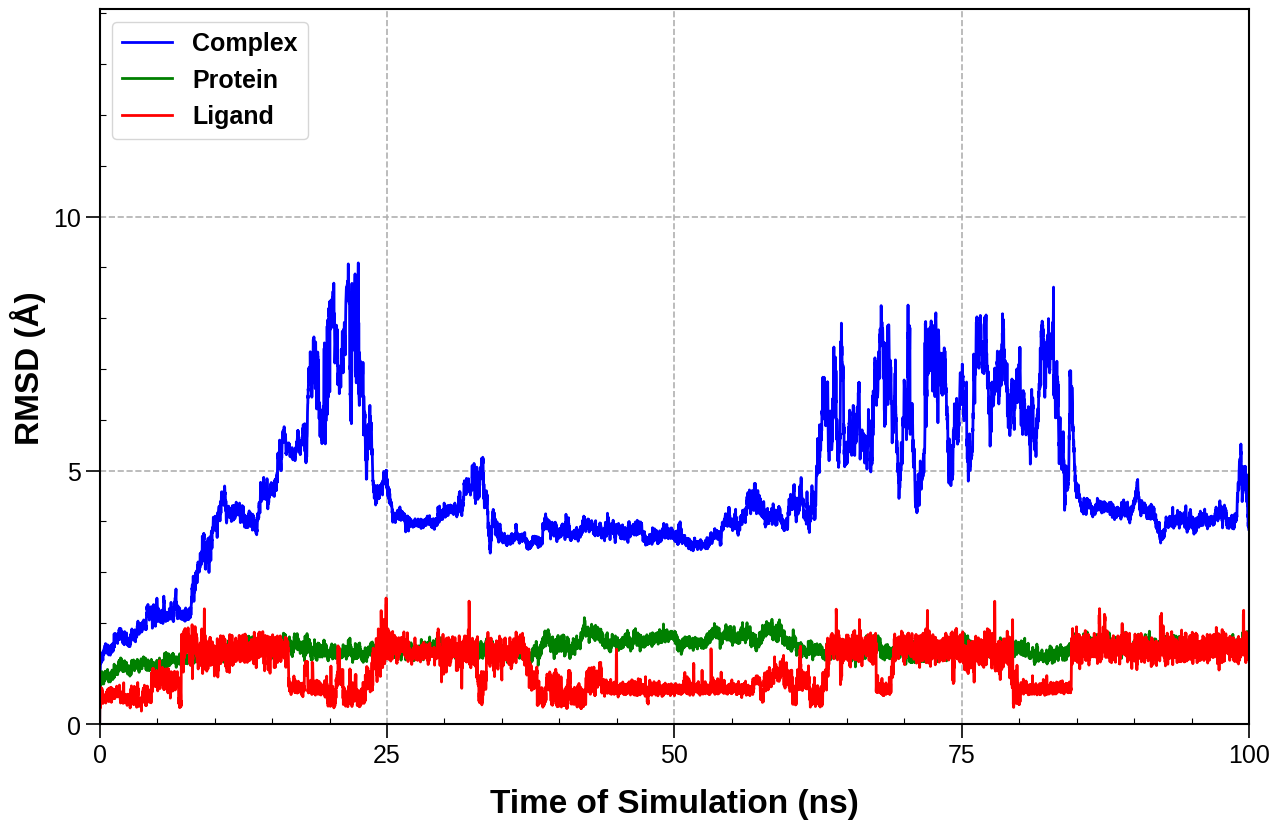

In [ ]:
# @title Run this code
# RMSD
# Configure fonts and styles
from matplotlib import rcParams
rcParams['font.family'] = 'Liberation Sans'
rcParams['xtick.labelsize'] = 18
rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['mathtext.default'] = 'regular'

def extract_xvg_data(file_path):
    """Extract time and RMSD values from an XVG file."""
    pattern = r"^\s*([\d\.]+)\s+([\d\.]+)"
    extracted_values = []

    with open(file_path, "r") as file:
        for line in file:
            match = re.match(pattern, line)
            if match:
                time_value = float(match.group(1))
                rmsd_value = float(match.group(2))
                extracted_values.append((time_value, rmsd_value))

    return extracted_values

def merge_xvg_data(complex_data, protein_data, ligand_data):
    """Merge RMSD data from complex, protein, and ligand based on time values."""
    merged_data = {}

    for time, rmsd in complex_data:
        merged_data[time] = [rmsd, None, None]

    for time, rmsd in protein_data:
        if time in merged_data:
            merged_data[time][1] = rmsd
        else:
            merged_data[time] = [None, rmsd, None]

    for time, rmsd in ligand_data:
        if time in merged_data:
            merged_data[time][2] = rmsd
        else:
            merged_data[time] = [None, None, rmsd]

    return [(time, *values) for time, values in sorted(merged_data.items())]

def plot_rmsd(csv_file, output_file):
    """Plot RMSD data from the CSV file."""
    data = pd.read_csv(csv_file)

    required_columns = ["time", "complex", "protein", "ligand"]
    if not all(col in data.columns for col in required_columns):
        raise ValueError(f"The CSV file must contain the following columns: {', '.join(required_columns)}")

    data["complex"] *= 10
    data["protein"] *= 10
    data["ligand"] *= 10

    plt.figure(figsize=(12.9, 8.4))
    plt.plot(data["time"], data["complex"], label="Complex", linestyle="-", color="blue", linewidth=2.0)
    plt.plot(data["time"], data["protein"], label="Protein", linestyle="-", color="green", linewidth=2.0)
    plt.plot(data["time"], data["ligand"], label="Ligand", linestyle="-", color="red", linewidth=2.0)

    plt.xlim(data["time"].min(), data["time"].max())
    plt.ylim(0, max(data["complex"].max(), data["protein"].max(), data["ligand"].max()) + 5)
    plt.xlabel("Time of Simulation (ns)", fontsize=24, fontweight="bold", labelpad=15)
    plt.ylabel("RMSD (\u00c5)", fontsize=24, fontweight="bold", labelpad=5)

    plt.gca().xaxis.set_major_locator(MultipleLocator(25))
    plt.gca().xaxis.set_minor_locator(MultipleLocator(5))
    plt.gca().yaxis.set_major_locator(MultipleLocator(5))
    plt.gca().yaxis.set_minor_locator(MultipleLocator(1))

    plt.grid(True, which="major", linestyle="--", linewidth=1.2)
    plt.legend(prop={"size": 18, "weight": "bold"}, loc="upper left")

    plt.tick_params(axis="x", which="major", direction="out", length=10, width=1.2)
    plt.tick_params(axis="x", which="minor", direction="in", length=4, width=0.8)
    plt.tick_params(axis="y", which="major", direction="out", length=10, width=1.2)
    plt.tick_params(axis="y", which="minor", direction="in", length=4, width=0.8)

    plt.gca().spines["top"].set_linewidth(1.5)
    plt.gca().spines["right"].set_linewidth(1.5)
    plt.gca().spines["left"].set_linewidth(1.5)
    plt.gca().spines["bottom"].set_linewidth(1.5)

    plt.tight_layout()
    plt.savefig(output_file, dpi=300, format="png")


    print(f"RMSD plot saved as {output_file}")

def main():
    complex_file = input('Enter complex XVG file: ')
    protein_file = input('Enter protein XVG file: ')
    ligand_file = input('Enter ligand XVG file: ')
    output_csv = input('Enter output CSV filename: ')
    output_plot = input('Enter output plot filename: ')

    complex_data = extract_xvg_data(complex_file)
    protein_data = extract_xvg_data(protein_file)
    ligand_data = extract_xvg_data(ligand_file)

    merged_data = merge_xvg_data(complex_data, protein_data, ligand_data)

    with open(output_csv, mode="w", newline="") as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(["time", "complex", "protein", "ligand"])
        writer.writerows(merged_data)

    print(f"Data has been written to {output_csv}")

    plot_rmsd(output_csv, output_plot)

if __name__ == "__main__":
    main()


## RMSF
**Input file:**


*   RMSF file (.xvg)

**Output file:**


*   CSV file of RMSF
*   Plot file (png)



Enter RMSF XVG file: rmsf.xvg
Enter output CSV filename: rmsf.csv
Enter output plot filename: rmsf_plot.png
Data has been written to rmsf.csv
RMSF plot saved as rmsf_plot.png


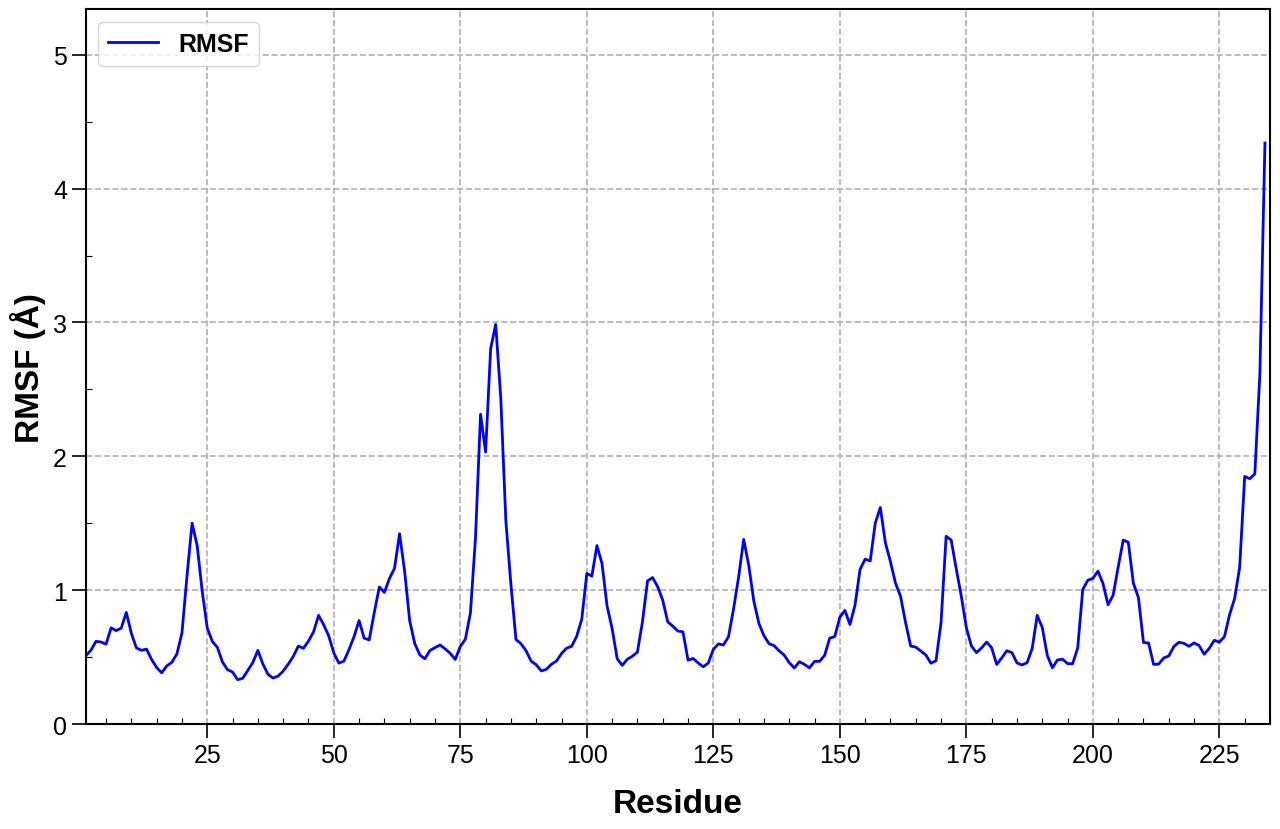

In [ ]:
# @title Run this Code
# RMSF
# Configure fonts and styles
rcParams['font.family'] = 'Liberation Sans'
rcParams['xtick.labelsize'] = 18
rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['mathtext.default'] = 'regular'

def extract_rmsf_data(file_path):
    """Extract residue and RMSF values from an XVG file."""
    pattern = r"^\s*(\d+)\s+([\d\.]+)"
    extracted_values = []

    with open(file_path, "r") as file:
        for line in file:
            match = re.match(pattern, line)
            if match:
                residue = int(match.group(1))
                rmsf = float(match.group(2))
                extracted_values.append((residue, rmsf))

    return extracted_values

def save_rmsf_csv(data, output_csv):
    """Save extracted RMSF data to a CSV file."""
    with open(output_csv, mode="w", newline="") as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(["residue", "rmsf"])
        writer.writerows(data)

    print(f"Data has been written to {output_csv}")

def plot_rmsf(csv_file, output_file):
    """Plot RMSF data from the CSV file."""
    data = pd.read_csv(csv_file)

    if 'residue' not in data.columns or 'rmsf' not in data.columns:
        raise ValueError("The CSV file must contain 'residue' and 'rmsf' columns.")

    data["rmsf"] *= 10

    plt.figure(figsize=(12.9, 8.4))
    plt.plot(data['residue'], data['rmsf'], label="RMSF", linestyle="-", color="blue", linewidth=2.0)

    plt.xlim(data['residue'].min(), data['residue'].max() + 1)
    plt.ylim(0, data['rmsf'].max() + 1)
    plt.xlabel("Residue", fontsize=24, fontweight="bold", labelpad=15)
    plt.ylabel("RMSF (\u00c5)", fontsize=24, fontweight="bold", labelpad=5)

    plt.gca().xaxis.set_major_locator(MultipleLocator(25))
    plt.gca().xaxis.set_minor_locator(MultipleLocator(5))
    plt.gca().yaxis.set_major_locator(MultipleLocator(1.0))
    plt.gca().yaxis.set_minor_locator(MultipleLocator(0.5))

    plt.grid(True, which="major", linestyle="--", linewidth=1.2)
    plt.legend(prop={"size": 18, "weight": "bold"}, loc="upper left")

    plt.tick_params(axis="x", which="major", direction="out", length=10, width=1.2)
    plt.tick_params(axis="x", which="minor", direction="in", length=4, width=0.8)
    plt.tick_params(axis="y", which="major", direction="out", length=10, width=1.2)
    plt.tick_params(axis="y", which="minor", direction="in", length=4, width=0.8)

    plt.gca().spines["top"].set_linewidth(1.5)
    plt.gca().spines["right"].set_linewidth(1.5)
    plt.gca().spines["left"].set_linewidth(1.5)
    plt.gca().spines["bottom"].set_linewidth(1.5)

    plt.tight_layout()
    plt.savefig(output_file, dpi=300, format="png")

    print(f"RMSF plot saved as {output_file}")

def main():
    input_file = input('Enter RMSF XVG file: ')
    output_csv = input('Enter output CSV filename: ')
    output_plot = input('Enter output plot filename: ')

    rmsf_data = extract_rmsf_data(input_file)
    save_rmsf_csv(rmsf_data, output_csv)
    plot_rmsf(output_csv, output_plot)

if __name__ == "__main__":
    main()


## Radius of Gyration
**Input file:**


*   Complex Rg (.xvg)
*   Protein Rg (.xvg)

**Output file:**


*   CSV file of Rg combined
*   Plot file (png)



Enter complex RoG XVG file: rog_comp.xvg
Enter protein RoG XVG file: rog_prot.xvg
Enter output CSV filename: rog.csv
Enter output plot filename: rog_plot.png
Data has been written to rog.csv
RoG plot saved as rog_plot.png


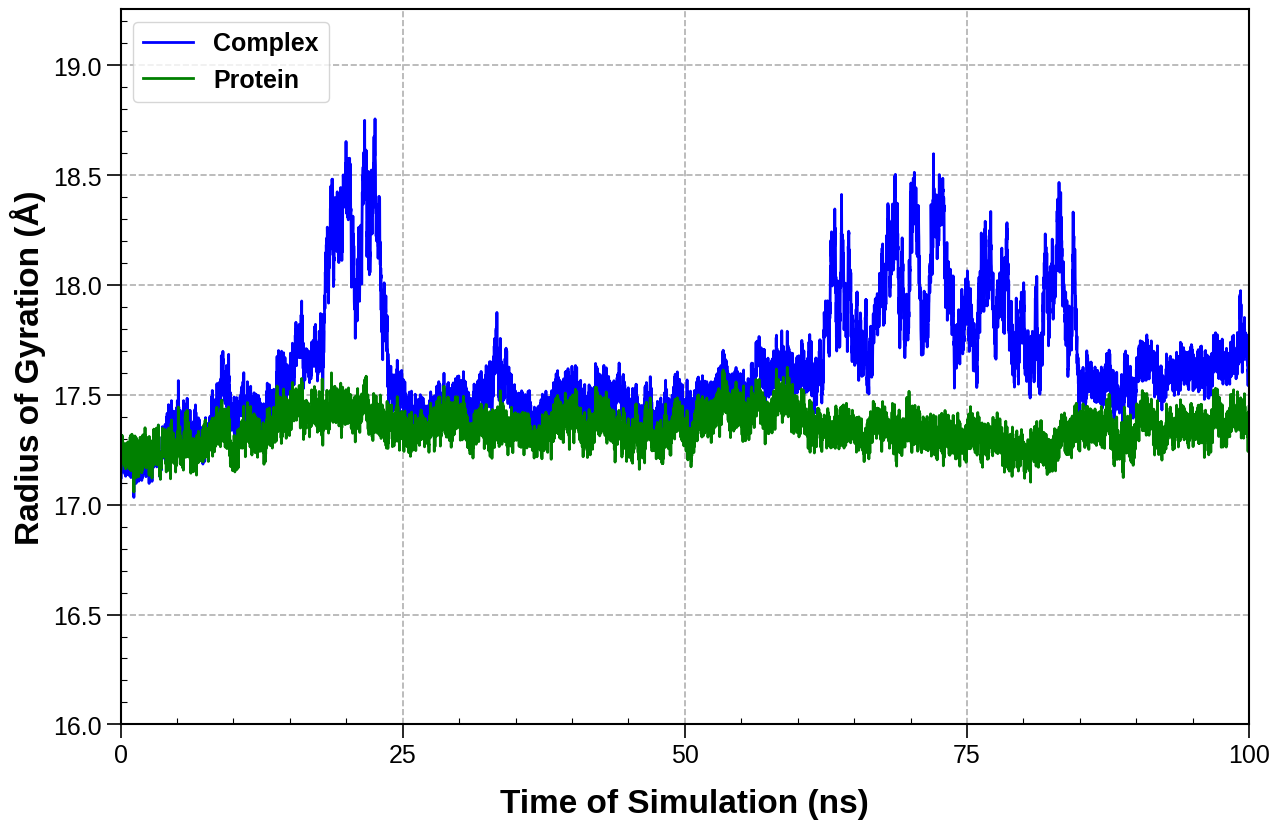

In [ ]:
# @title Run this Code
# Radius of Gyration
# Configure plot styles
rcParams['font.family'] = 'Liberation Sans'
rcParams['xtick.labelsize'] = 18
rcParams['ytick.labelsize'] = 18
rcParams['mathtext.default'] = 'regular'

def convert_units(data):
    """Convert time from ps to ns and RoG from nm to Å."""
    return [(time / 1000, complex_rg * 10 if complex_rg is not None else None, protein_rg * 10 if protein_rg is not None else None) for time, complex_rg, protein_rg in data]

def extract_rog_data(file_path):
    """Extract time and Radius of Gyration (RoG) values from an XVG file."""
    extracted_values = []

    with open(file_path, "r") as file:
        for line in file:
            if line.startswith(('@', '#')):
                continue  # Skip metadata and comments
            parts = line.split()
            if len(parts) >= 2:
                time = float(parts[0])
                rg = float(parts[1])
                extracted_values.append((time, rg))

    return extracted_values

def merge_rog_data(complex_data, protein_data):
    """Merge RoG data from complex and protein based on time values."""
    merged_data = {}

    for time, rog in complex_data:
        merged_data[time] = [rog, None]

    for time, rog in protein_data:
        if time in merged_data:
            merged_data[time][1] = rog
        else:
            merged_data[time] = [None, rog]

    return [(time, *values) for time, values in sorted(merged_data.items())]

def save_rog_csv(data, output_csv):
    """Save extracted RoG data to a CSV file."""
    with open(output_csv, mode="w", newline="") as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(["time", "complex", "protein"])
        writer.writerows(data)

    print(f"Data has been written to {output_csv}")

def plot_rog(csv_file, output_file):
    """Plot Radius of Gyration data from the CSV file."""
    data = pd.read_csv(csv_file)

    if "time" not in data.columns or "complex" not in data.columns or "protein" not in data.columns:
        raise ValueError("The CSV file must contain 'time', 'complex', and 'protein' columns.")

    plt.figure(figsize=(12.9, 8.4))
    plt.plot(data["time"], data["complex"], label="Complex", linestyle="-", color="blue", linewidth=2.0)
    plt.plot(data["time"], data["protein"], label="Protein", linestyle="-", color="green", linewidth=2.0)

    # adjust this for plot axis
    plt.xlim(0, max(data["time"]))
    plt.ylim(16, max(data["complex"].max(), data["protein"].max()) + 0.5)
    plt.xlabel("Time of Simulation (ns)", fontsize=24, fontweight="bold", labelpad=15)
    plt.ylabel("Radius of Gyration (\u00c5)", fontsize=24, fontweight="bold", labelpad=5)

    plt.gca().xaxis.set_major_locator(MultipleLocator(25))
    plt.gca().xaxis.set_minor_locator(MultipleLocator(5))
    plt.gca().yaxis.set_major_locator(MultipleLocator(0.5))
    plt.gca().yaxis.set_minor_locator(MultipleLocator(0.1))

    plt.grid(True, which="major", linestyle="--", linewidth=1.2)
    plt.legend(prop={"size": 18, "weight": "bold"}, loc="upper left")

    plt.tick_params(axis="x", which="major", direction="out", length=10, width=1.2)
    plt.tick_params(axis="x", which="minor", direction="in", length=4, width=0.8)
    plt.tick_params(axis="y", which="major", direction="out", length=10, width=1.2)
    plt.tick_params(axis="y", which="minor", direction="in", length=4, width=0.8)

    for spine in plt.gca().spines.values():
        spine.set_linewidth(1.5)

    plt.tight_layout()
    plt.savefig(output_file, dpi=300, format="png")

    print(f"RoG plot saved as {output_file}")

def main():
    complex_file = input('Enter complex RoG XVG file: ')
    protein_file = input('Enter protein RoG XVG file: ')
    output_csv = input('Enter output CSV filename: ')
    output_plot = input('Enter output plot filename: ')

    complex_data = extract_rog_data(complex_file)
    protein_data = extract_rog_data(protein_file)

    merged_data = merge_rog_data(complex_data, protein_data)
    merged_data = convert_units(merged_data)
    save_rog_csv(merged_data, output_csv)
    plot_rog(output_csv, output_plot)

if __name__ == "__main__":
    main()


## Hydrogen Bonds
**Input file:**


*   Hydrogen bonds (.xvg)

**Output file:**


*   CSV file of HB
*   Plot file (png)



Enter hydrogen bond XVG file: hb.xvg
Enter output CSV filename: hb.csv
Enter output plot filename: hb_plot.png
Data has been written to hb.csv
Hydrogen bond plot saved as hb_plot.png


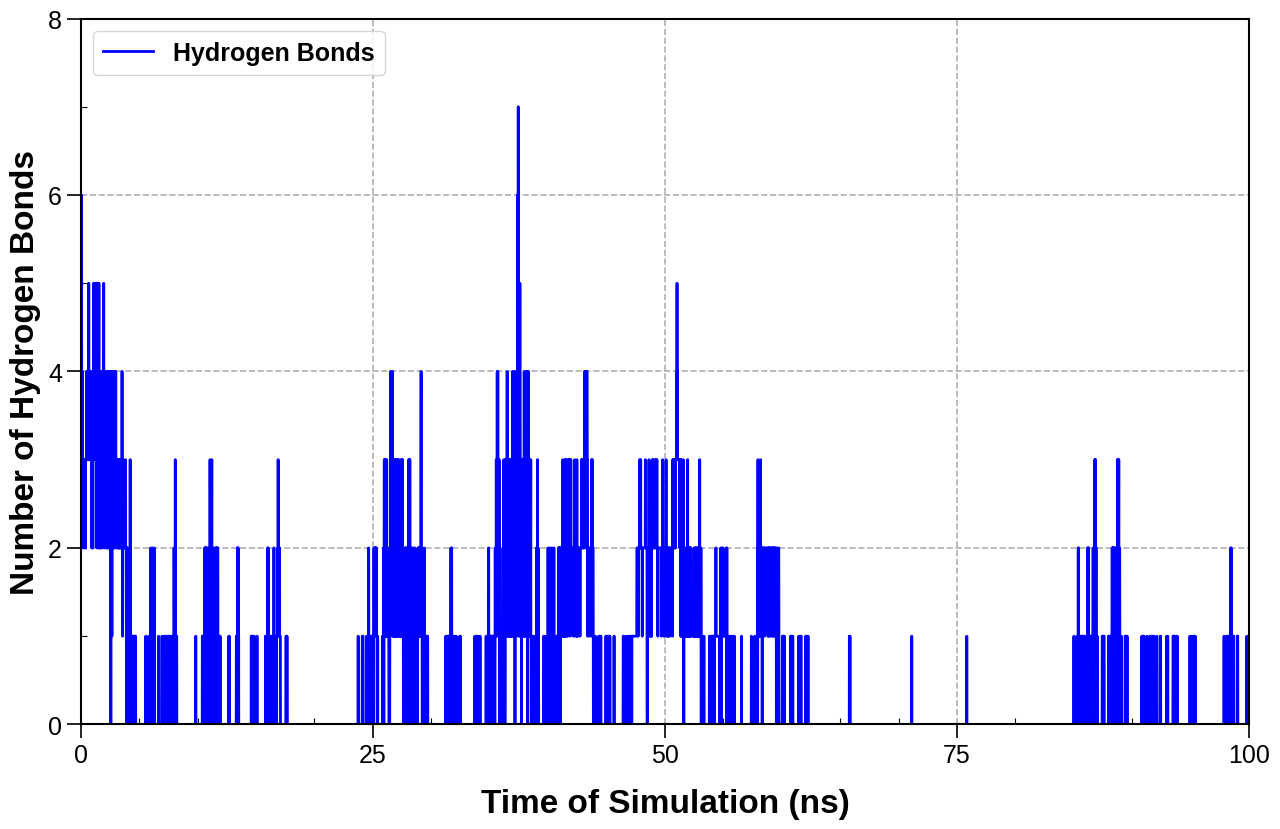

In [ ]:
# @title Run this Code
# Hydrogen Bonds
# Configure fonts and styles
from matplotlib import rcParams
rcParams['font.family'] = 'Liberation Sans'
rcParams['xtick.labelsize'] = 18
rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['mathtext.default'] = 'regular'

def extract_hb_data(file_path):
    """Extract time and hydrogen bond values from an XVG file."""
    pattern = r"^\s*([0-9.]+)\s+([0-9]+)"
    extracted_values = []

    with open(file_path, "r") as file:
        for line in file:
            match = re.match(pattern, line)
            if match:
                time = float(match.group(1))
                hb_count = int(match.group(2))
                extracted_values.append((time, hb_count))

    return extracted_values

def save_hb_csv(data, output_csv):
    """Save extracted hydrogen bond data to a CSV file."""
    with open(output_csv, mode="w", newline="") as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(["time", "hydrogen_bonds"])
        writer.writerows(data)

    print(f"Data has been written to {output_csv}")

def plot_hb(csv_file, output_file):
    """Plot hydrogen bond data from the CSV file."""
    data = pd.read_csv(csv_file)

    if "time" not in data.columns or "hydrogen_bonds" not in data.columns:
        raise ValueError("The CSV file must contain 'time' and 'hydrogen_bonds' columns.")

    plt.figure(figsize=(12.9, 8.4))
    plt.plot(data["time"], data["hydrogen_bonds"], label="Hydrogen Bonds", linestyle="-", color="blue", linewidth=2.0)

    plt.xlim(data["time"].min(), data["time"].max())
    plt.ylim(0, data["hydrogen_bonds"].max() + 1)
    plt.xlabel("Time of Simulation (ns)", fontsize=24, fontweight="bold", labelpad=15)
    plt.ylabel("Number of Hydrogen Bonds", fontsize=24, fontweight="bold", labelpad=5)

    plt.gca().xaxis.set_major_locator(MultipleLocator(25))
    plt.gca().xaxis.set_minor_locator(MultipleLocator(5))
    plt.gca().yaxis.set_major_locator(MultipleLocator(2))
    plt.gca().yaxis.set_minor_locator(MultipleLocator(1))

    plt.grid(True, which="major", linestyle="--", linewidth=1.2)
    plt.legend(prop={"size": 18, "weight": "bold"}, loc="upper left")

    plt.tick_params(axis="x", which="major", direction="out", length=10, width=1.2)
    plt.tick_params(axis="x", which="minor", direction="in", length=4, width=0.8)
    plt.tick_params(axis="y", which="major", direction="out", length=10, width=1.2)
    plt.tick_params(axis="y", which="minor", direction="in", length=4, width=0.8)

    for spine in plt.gca().spines.values():
        spine.set_linewidth(1.5)

    plt.tight_layout()
    plt.savefig(output_file, dpi=300, format="png")

    print(f"Hydrogen bond plot saved as {output_file}")

def main():
    input_file = input('Enter hydrogen bond XVG file: ')
    output_csv = input('Enter output CSV filename: ')
    output_plot = input('Enter output plot filename: ')

    hb_data = extract_hb_data(input_file)
    save_hb_csv(hb_data, output_csv)
    plot_hb(output_csv, output_plot)

if __name__ == "__main__":
    main()


### Check Available Fonts

In [ ]:
import matplotlib.font_manager as fm
for font in fm.findSystemFonts():
    print(fm.FontProperties(fname=font).get_name())
